<div style="text-align: center;">
<div class="alert alert-block alert-info">
<span style="font-family:Georgia; font-size:2.0em;"> Introduction to Data Science Bootcamp</span> <br><br>
<span style="font-family:Georgia; font-size:1.5em;"> Fundação Getulio Vargas - Rio de Janeiro</span> <br><br>
<span style="font-family:Georgia; font-size:1.5em;"> Jorge Poco </span> <br>
<span style="font-family:Georgia; font-size:1.0em;">UCSP, Peru</span><br><br><br>

<span style="font-family:Georgia; font-size:1.5em;">Based on [material](https://github.com/altair-viz/altair_notebooks/tree/master/notebooks) from Brian E. Granger.</span>
</div>

# Altair: Statistical Visualization for Python

[Altair](http://github.com/altair-viz/altair/) provides a declarative Python API for statistical visualization, built on top of [Vega-Lite](http://vega.github.io/vega-lite/).

The notebooks listed here provide a set of tutorials and examples of Altair's use. For more complete documentation, see [Altair's Documentation](http://altair-viz.github.io/).

## Quick Altair example

Here is a quick example of the Altair API in action:

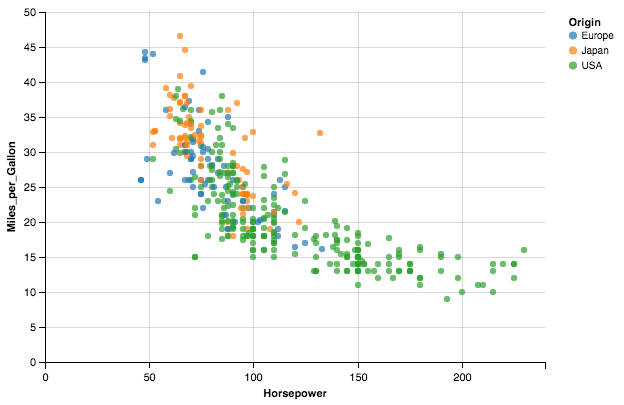

In [1]:
import altair as alt

# Uncomment/run this line to enable Altair in JupyterLab/nteract:
# alt.enable_mime_rendering()

data = alt.load_dataset('cars')

chart = alt.Chart(data).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
)

chart

In most cases, the data passed to the ``Chart`` will be a standard Pandas dataframe, as we can see here:

In [2]:
data.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


Under the hood, Altair interprets the input and constructs a Python dictionary of the vega spec:

In [3]:
chart.to_dict(data=False)

{'$schema': 'https://vega.github.io/schema/vega-lite/v1.2.1.json',
 'encoding': {'color': {'field': 'Origin', 'type': 'nominal'},
  'x': {'field': 'Horsepower', 'type': 'quantitative'},
  'y': {'field': 'Miles_per_Gallon', 'type': 'quantitative'}},
 'mark': 'circle'}

When converted to JSON, this spec is exactly in the form expected by Vega-Lite.

## Comparison to Matplotlib

To clarify the declarative nature of Altair, we perform the same visualization with [Matplotlib](http://matplotlib.org/). In this case, the user has to manually perform a group-by operation and label the axes and legend. With Altairs declarative approach, the user only has to specify *what* should happen, not *how*.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

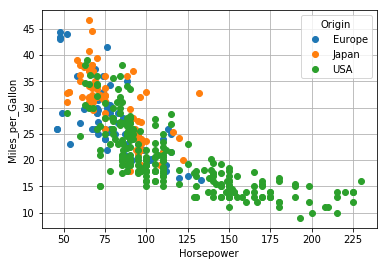

In [5]:
for (origin), group in data.groupby('Origin'):
    plt.plot(group['Horsepower'], group['Miles_per_Gallon'],
             'o', label=origin)
plt.legend(title='Origin')
plt.xlabel('Horsepower')
plt.ylabel('Miles_per_Gallon');
plt.grid(True)

## Documentation

You can learn more about Altair at its documentation site:

- [Altair Documentation](http://altair-viz.github.io)

Additionally, it can be useful when using Altair to understand the Vega-Lite library that underlies it. Vega-Lite's documentation can be found here:

- [Vega-Lite Documentation](https://vega.github.io/vega-lite/docs/)

# Tutorial: Introduction to Altair

This tutorial will guide you through the process of creating visualizations in Altair. For details on installing Altair or its underlying philosophy, please see the [Altair Documentation](http://altair-viz.github.io/)

Outline:

- [The data](#The-data)
- [The `Chart` object](#The-Chart-object)
- [Data encodings and marks](#Data-encodings-and-marks)
- [Data transformation: Aggregation](#Data-transformation:-Aggregation)
- [Customizing your visualization](#Customizing-your-visualization)
- [Publishing a visualization online](#Publishing-a-visualization-online)

This tutorial is written in the form of a Jupyter Notebook; we suggest downloading the notebook and following along, executing the code yourself as we go. For creating Altair visualizations in the notebook, all that is required is to [install the package and its dependencies](https://altair-viz.github.io/installation.html) and import the Altair namespace:

In [6]:
import altair as alt

In [7]:
# Uncomment/run this line to enable Altair in JupyterLab/nteract:
# alt.enable_mime_rendering()

## The data

Data in Altair is built around the [Pandas Dataframe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).
For the purposes of this tutorial, we'll start by importing Pandas and creating a simple `DataFrame` to visualize, with a categorical variable in column `a` and a numerical variable in column `b`:

In [8]:
import pandas as pd
data = pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})
data

,a,b
0,C,2
1,C,7
2,C,4
3,D,1
4,D,2
5,D,6
6,E,8
7,E,4
8,E,7


In Altair, every dataset should be provided as a `Dataframe`, or as a URL referencing an appropriate dataset (see [Defining Data](https://altair-viz.github.io/documentation/data.html)).

## The `Chart` object

The fundamental object in Altair is the ``Chart``. It takes the dataframe as a single argument:

In [9]:
chart = alt.Chart(data)

Fundamentally, a ``Chart`` is an object which knows how to emit a JSON dictionary representing the data and visualization encodings (see below), which can be sent to the notebook and rendered by the Vega-Lite JavaScript library.

Here is what that JSON looks like for the current chart:

In [10]:
chart.to_dict()

{'$schema': 'https://vega.github.io/schema/vega-lite/v1.2.1.json',
 'data': {'values': [{'a': 'C', 'b': 2},
   {'a': 'C', 'b': 7},
   {'a': 'C', 'b': 4},
   {'a': 'D', 'b': 1},
   {'a': 'D', 'b': 2},
   {'a': 'D', 'b': 6},
   {'a': 'E', 'b': 8},
   {'a': 'E', 'b': 4},
   {'a': 'E', 'b': 7}]},
 'mark': 'point'}

At this point the specification contains only the data, and no visualization specification.

## Chart Marks

Next we can decide what sort of *mark* we would like to use to represent our data.
For example, we can choose the ``point`` mark to represent each data as a point on the plot:

In [11]:
chart = alt.Chart(data).mark_point()
chart

The result is a visualization with one point per row in the data, though it is not a particularly interesting: all the points are stacked right on top of each other!
To see how this affects the specification, we can once again examine the JSON:

In [12]:
chart.to_dict()

{'$schema': 'https://vega.github.io/schema/vega-lite/v1.2.1.json',
 'data': {'values': [{'a': 'C', 'b': 2},
   {'a': 'C', 'b': 7},
   {'a': 'C', 'b': 4},
   {'a': 'D', 'b': 1},
   {'a': 'D', 'b': 2},
   {'a': 'D', 'b': 6},
   {'a': 'E', 'b': 8},
   {'a': 'E', 'b': 4},
   {'a': 'E', 'b': 7}]},
 'mark': 'point'}

Notice that now in addition to the data, the specification includes information about the mark type.

## Data encodings

The next step is to add *visual encodings* (or *encodings* for short) to the chart. A visual encoding specifies how a given data column should be mapped onto the visual properties of the visualization.
Some of the more frequenty used visual encodings are listed here:

* X: x-axis value
* Y: y-axis value
* Color: color of the mark
* Opacity: transparency/opacity of the mark
* Shape: shape of the mark
* Size: size of the mark
* Row: row within a grid of facet plots
* Column: column within a grid of facet plots

For a complete list of these encodings, see the [Encodings](https://altair-viz.github.io/documentation/encoding.html) section of the documentation.

Visual encodings can be created with the `encode()` method of the `Chart` object. For example, we can start by mapping the `y` axis of the chart to column `a`:

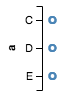

In [13]:
c = alt.Chart(data).mark_point().encode(y='a')
c # save the Chart to a variable and then display

The result is a one-dimensional visualization representing the values taken on by `a`.
As above, we can view the JSON data generated for this visualization:

In [14]:
c.to_dict()

{'$schema': 'https://vega.github.io/schema/vega-lite/v1.2.1.json',
 'data': {'values': [{'a': 'C', 'b': 2},
   {'a': 'C', 'b': 7},
   {'a': 'C', 'b': 4},
   {'a': 'D', 'b': 1},
   {'a': 'D', 'b': 2},
   {'a': 'D', 'b': 6},
   {'a': 'E', 'b': 8},
   {'a': 'E', 'b': 4},
   {'a': 'E', 'b': 7}]},
 'encoding': {'y': {'field': 'a', 'type': 'nominal'}},
 'mark': 'point'}

The result is the same as above with the addition of the `'encoding'` key, which specifies the visualization channel (`y`), the name of the field (`a`), and the type of the variable (`nominal`).

Altair is able to automatically determine the type of the variable using built-in heuristics. Altair and Vega-Lite support four primitive data types:

<table>
  <tr>
    <th>Data Type</th>
    <th>Code</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>quantitative</td>
    <td>Q</td>
    <td>Number (real-valued)</td>
  </tr>
  <tr>
    <td>nominal</td>
    <td>N</td>
    <td>Unordered categorical</td>
  </tr>
  <tr>
    <td>ordinal</td>
    <td>O</td>
    <td>Ordered categorial</td>
  </tr>
  <tr>
    <td>temporal</td>
    <td>T</td>
    <td>Date/time</td>
  </tr>
</table>

You can set the data type of a column explicitly using a one letter code as follows:

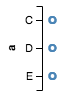

In [15]:
alt.Chart(data).mark_point().encode(y='a:N')

The visualization can be made more interesting by adding another channel to the encoding: let's encode column `b` as the `x` position:

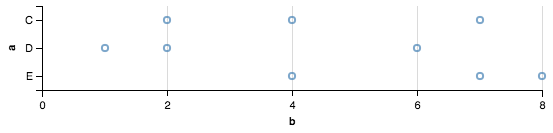

In [16]:
alt.Chart(data).mark_point().encode(
    y='a',
    x='b'
)

With two visual channels encoded, we can see the raw data points in the `DataFrame`. A different mark type can be chosen using a different `mark_*()` method, such as `mark_bar()`:

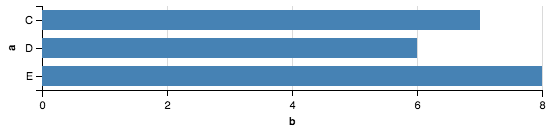

In [17]:
alt.Chart(data).mark_bar().encode(
    alt.Y('a'),
    alt.X('b')
)

Notice, we have used a slightly different syntax for specifying the channels using classes (`X` and `Y`) passed as positional arguments. These classes allow additional arguments to be passed to each channel.

Here are some of the more commonly used `mark_*()` methods supported in Altair and Vega-Lite; for more detail see [Markings](https://altair-viz.github.io/documentation/marks.html) in the Altair documentation:

<table>
  <tr>
    <th>Method</th>
  </tr>
  <tr>
    <td><code>mark_area()</code></td>
  </tr>
  <tr>
    <td><code>mark_bar()</code></td>
  </tr>
  <tr>
    <td><code>mark_circle()</code></td>
  </tr>
  <tr>
    <td><code>mark_line()</code></td>
  </tr>
  <tr>
    <td><code>mark_point()</code></td>
  </tr>
  <tr>
    <td><code>mark_rule()</code></td>
  </tr>
  <tr>
    <td><code>mark_square()</code></td>
  </tr>
  <tr>
    <td><code>mark_text()</code></td>
  </tr>
  <tr>
    <td><code>mark_tick()</code></td>
  </tr>
</table>



## Data transformation: Aggregation

Altair and Vega-Lite also support a variety of built-in data transformations, such as aggregation. The easiest way to specify such aggregations is through a string-function syntax in the argument to the column name. For example, here we will plot not all the values, but a single point representing the average of the x-values for a given y-value:

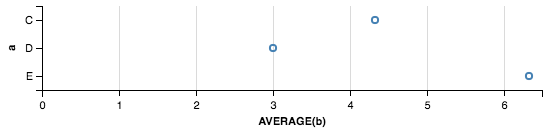

In [18]:
alt.Chart(data).mark_point().encode(
    y='a',
    x='average(b)'
)

Conceptually, this is equivalent to the following groupby operation:

In [19]:
data.groupby('a').mean()

,b
a,
C,4.333333
D,3.000000
E,6.333333


More typically, aggregated values are displayed using bar charts.
Making this change is as simple as replacing `mark_point()` with `mark_bar()`:

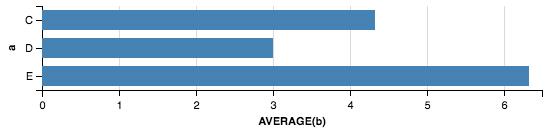

In [20]:
c = alt.Chart(data).mark_bar().encode(
    y='a',
    x='average(b)'
)
c # save the Chart to a variable and then display

As above, Altair's role in this visualization is converting the resulting object into an appropriate JSON dict.
Here it is, leaving out the data for clarity:

In [21]:
c.to_dict(data=False)

{'$schema': 'https://vega.github.io/schema/vega-lite/v1.2.1.json',
 'encoding': {'x': {'aggregate': 'average',
   'field': 'b',
   'type': 'quantitative'},
  'y': {'field': 'a', 'type': 'nominal'}},
 'mark': 'bar'}

Notice that Altair has taken the string `'average(b)'` and converted it to a mapping that includes `field`, `type`, and `aggregate`. The full shorthand syntax for the column names in Altair also includes the explicit type code separated by a column:

In [22]:
x = alt.X('average(b):Q')
x.to_dict()

{'aggregate': 'average', 'field': 'b', 'type': 'quantitative'}

This shorthand is equivalent to spelling-out these properties by name:

In [23]:
x = alt.X('b', aggregate='average', type='quantitative')
x.to_dict()

{'aggregate': 'average', 'field': 'b', 'type': 'quantitative'}

This is one benefit of using the Altair API over writing the Vega-Lite spec from scratch: valid Vega-Lite specifications can be created very succinctly, with less boilerplate code.

## Customizing your visualization

To speed the process of data exploration, Altair (via Vega-Lite) makes some choices about default properties of the visualization.
Altair also provides an API to customize the look of the visualization. For example, we can use the `X` object we saw above to override the default x-axis title:

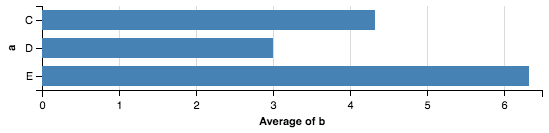

In [24]:
alt.Chart(data).mark_bar().encode(
    y='a',
    x=alt.X('average(b)', axis=alt.Axis(title='Average of b'))
)

The properties of marks can be configured by passing keyword arguments to the `mark_*()` methods:

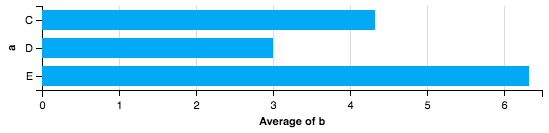

In [25]:
alt.Chart(data).mark_bar(color='#03A9F4').encode(
    y='a',
    x=alt.X('average(b)', axis=alt.Axis(title='Average of b'))
)

Similarly, we can use various `configure_*()` methods to adjust global properties of the chart, such as the chart width or height:

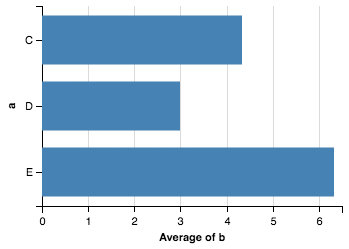

In [26]:
c = alt.Chart(data).mark_bar().encode(
    y='a',
    x=alt.X('average(b)', axis=alt.Axis(title='Average of b'))
).configure_scale(
    bandSize=50  # scale.bandSize adjusts thickness (in pixels) of bars
).configure_cell(
    width=300  # cell.width adjusts the width (in pixels) of the chart
)

c

As above, we can inspect how these configuration options affect the resulting Vega-lite specification:

In [27]:
c.to_dict(data=False)

{'$schema': 'https://vega.github.io/schema/vega-lite/v1.2.1.json',
 'config': {'cell': {'width': 300.0}, 'scale': {'bandSize': 50.0}},
 'encoding': {'x': {'aggregate': 'average',
   'axis': {'title': 'Average of b'},
   'field': 'b',
   'type': 'quantitative'},
  'y': {'field': 'a', 'type': 'nominal'}},
 'mark': 'bar'}

To learn more about the various configuration options, one useful place to start is Altair's ``Config`` object, along with IPython's documentation capabilities:

In [28]:
Config?

Object `Config` not found.


You can also read more in Altair's [Configuration](https://altair-viz.github.io/documentation/config.html) documentation.

## Publishing a visualization online

Because Altair produces Vega-Lite specifications, it is relatively straightforward to export charts and publish them on the web as Vega-Lite plots.
All that is required is to load the Vega-Lite javascript library, and pass it the JSON plot specification output by Altair.
For convenience Altair contains a built-in bare-bones HTML template that can be used to display any plot.
Here's the template with an empty chart for clarity:

In [29]:
print(alt.Chart().to_html())


<!DOCTYPE html>
<head>
  <title>Vega-Lite Chart</title>
  <meta charset="utf-8">

  <script src="https://d3js.org/d3.v3.min.js"></script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/vega/2.6.5/vega.min.js"></script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/vega-lite/1.2.1/vega-lite.min.js"></script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/vega-embed/2.2.0/vega-embed.min.js" charset="utf-8"></script>

  <style media="screen">
    /* Add space between vega-embed links  */
    .vega-actions a {
      margin-right: 5px;
    }
  </style>
</head>
<body>
  <!-- Container for the visualization -->
  <div id="vis"></div>

  <script>
  var vlSpec = {
    "mark": "point",
    "$schema": "https://vega.github.io/schema/vega-lite/v1.2.1.json"
}

  var embedSpec = {
    mode: "vega-lite",  // Instruct Vega-Embed to use the Vega-Lite compiler
    spec: vlSpec
  };

  // Embed the visualization in the container with id `vis`
  vg.embed("#vis", embedSpec, function(e

All that must be changed is the ``vlSpec`` variable, which should contain the Vega-Lite spec output by ``chart.to_dict()``.
This is done automatically using the ``Chart.savechart`` method:

In [30]:
chart = alt.Chart(data).mark_bar().encode(
    y='a',
    x='average(b)'
)

chart.savechart('example.html')

We can view the output in an iframe within the notebook (note that some online notebook viewers will not show iframes for security reasons):

In [31]:
# Display IFrame in IPython
from IPython.display import IFrame
IFrame('example.html', width=400, height=200)

Alternatively, you can use your web browser to open the file manually to confirm that it works: [example.html](example.html).

## Learning More

For more information on Altair, please refer to Altair's online documentation: http://altair-viz.github.io/

You can also see some of the example plots listed in the [accompanying notebooks](01-Index.ipynb).